In [115]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
con = duckdb.connect('../github_stars.db')

In [117]:
query_stars = """
SELECT *
FROM repo_stars_daily as d
JOIN repo_stars_monthly as m
ON d.repo_id = m.repo_id
"""

df_stars = con.sql(query_stars).df() 
df_stars.to_csv("stars.csv")


# Stars

In [118]:
df_stars['event_period'] = pd.to_datetime(df_stars['event_period'])
df_stars['event_period_1'] = pd.to_datetime(df_stars['event_period_1'])

repo_id_to_plot = df_stars['repo_id'].unique()[0]
repo_name_to_plot = df_stars[df_stars['repo_id'] == repo_id_to_plot]['repo_name'].unique()[0]

daily_data = df_stars[df_stars['repo_id'] == repo_id_to_plot]
monthly_data = df_stars[df_stars['repo_id_1'] == repo_id_to_plot]

max_daily_stars = daily_data.groupby('event_period')['event_count'].max().reset_index()

max_monthly_stars = monthly_data.groupby('event_period_1')['event_count_1'].max().reset_index()

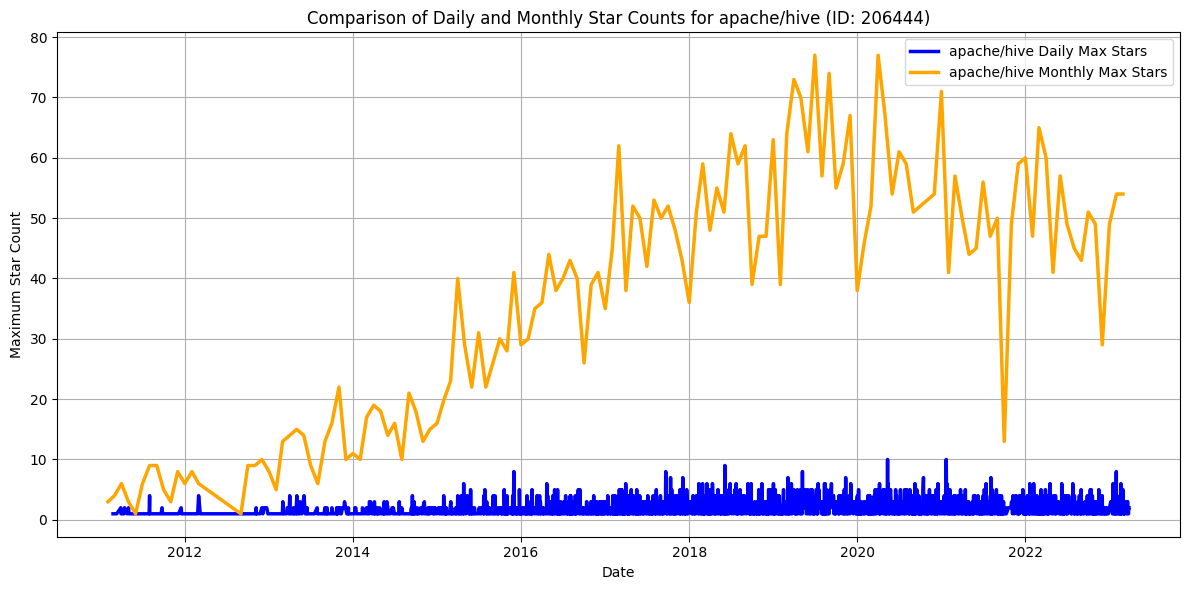

In [119]:
plt.figure(figsize=(12, 6))

plt.plot(max_daily_stars['event_period'], max_daily_stars['event_count'], 
         label=f'{repo_name_to_plot} Daily Max Stars', color='blue', linewidth=2.5)

plt.plot(max_monthly_stars['event_period_1'], max_monthly_stars['event_count_1'], 
         label=f'{repo_name_to_plot} Monthly Max Stars', color='orange', linewidth=2.5)

plt.title(f'Comparison of Daily and Monthly Star Counts for {repo_name_to_plot} (ID: {repo_id_to_plot})')
plt.xlabel('Date')
plt.ylabel('Maximum Star Count')
plt.xticks()
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [120]:
cumul_stars_repo1 = df_stars[['repo_id', 'event_period', 'cumul_count']].drop_duplicates()
cumul_stars_repo1['event_period'] = pd.to_datetime(cumul_stars_repo1['event_period']) 
cumul_stars_repo1 = cumul_stars_repo1.sort_values(['repo_id', 'event_period']) 
cumul_stars_repo1['smoothed_daily'] = cumul_stars_repo1.groupby('repo_id')['cumul_count'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())


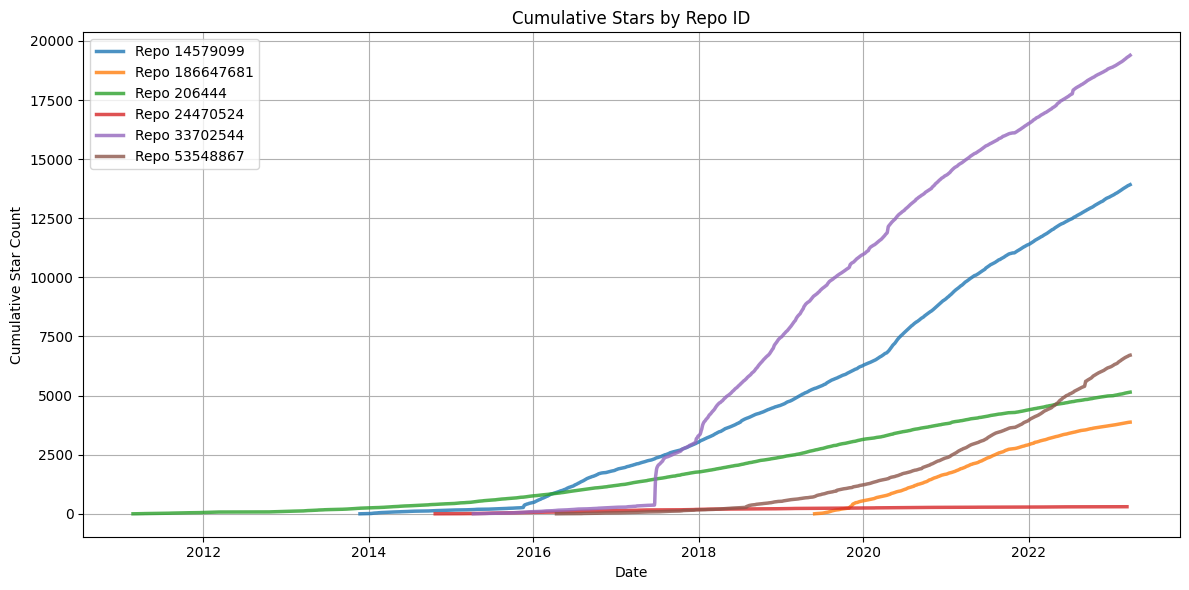

In [121]:
plt.figure(figsize=(12, 6))
for repo_id in cumul_stars_repo1['repo_id'].unique():
    user_daily = cumul_stars_repo1[cumul_stars_repo1['repo_id'] == repo_id]
    plt.plot(user_daily['event_period'], user_daily['smoothed_daily'], 
             label=f'Repo {repo_id}', alpha=0.8, linewidth=2.5)


plt.title('Cumulative Stars by Repo ID')
plt.xlabel('Date')
plt.ylabel('Cumulative Star Count')
plt.xticks()
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Commits

In [122]:
query_commits = """
SELECT *
FROM repo_commits_daily as d
JOIN repo_commits_monthly as m
ON d.repo_id = m.repo_id
"""

df_commits = con.sql(query_commits).df() 
df_commits.to_csv("stars.csv")

In [123]:
df_commits['event_period'] = pd.to_datetime(df_commits['event_period'])
df_commits['event_period_1'] = pd.to_datetime(df_commits['event_period_1'])

In [124]:
repo_id_to_plot = df_commits['repo_id'].unique()[0] 
repo_name_to_plot = df_commits[df_commits['repo_id'] == repo_id_to_plot]['repo_name'].unique()[0]

daily_data = df_commits[df_commits['repo_id'] == repo_id_to_plot]
monthly_data = df_commits[df_commits['repo_id_1'] == repo_id_to_plot]

max_daily_commits = daily_data.groupby('event_period')['event_count'].max().reset_index()

max_monthly_commits = monthly_data.groupby('event_period_1')['event_count_1'].max().reset_index()

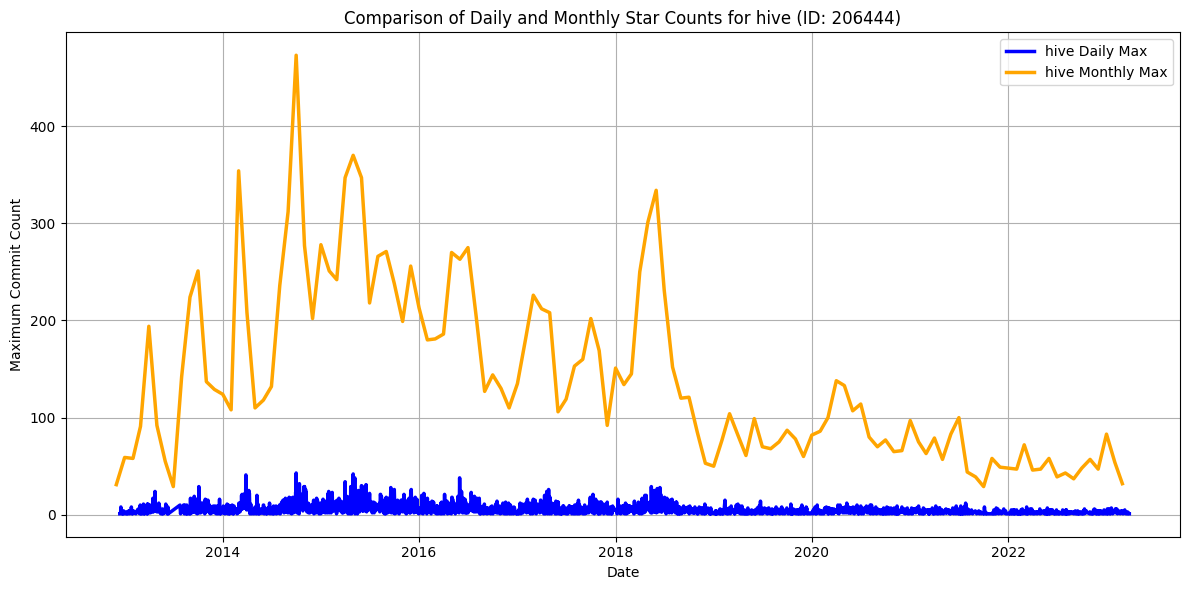

In [125]:
plt.figure(figsize=(12, 6))

plt.plot(max_daily_commits['event_period'], max_daily_commits['event_count'], 
         label=f'{repo_name_to_plot} Daily Max', color='blue', linewidth=2.5)

plt.plot(max_monthly_commits['event_period_1'], max_monthly_commits['event_count_1'], 
         label=f'{repo_name_to_plot} Monthly Max', color='orange', linewidth=2.5)


plt.title(f'Comparison of Daily and Monthly Star Counts for {repo_name_to_plot} (ID: {repo_id_to_plot})')
plt.xlabel('Date')
plt.ylabel('Maximum Commit Count')
plt.xticks()
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [126]:
cumul_commits_repo1 = df_commits[['repo_id', 'event_period', 'cumul_count']].drop_duplicates()
cumul_commits_repo1['event_period'] = pd.to_datetime(cumul_commits_repo1['event_period']) 
cumul_commits_repo1 = cumul_commits_repo1.sort_values(['repo_id', 'event_period'])  
cumul_commits_repo1['smoothed_daily'] = cumul_commits_repo1.groupby('repo_id')['cumul_count'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

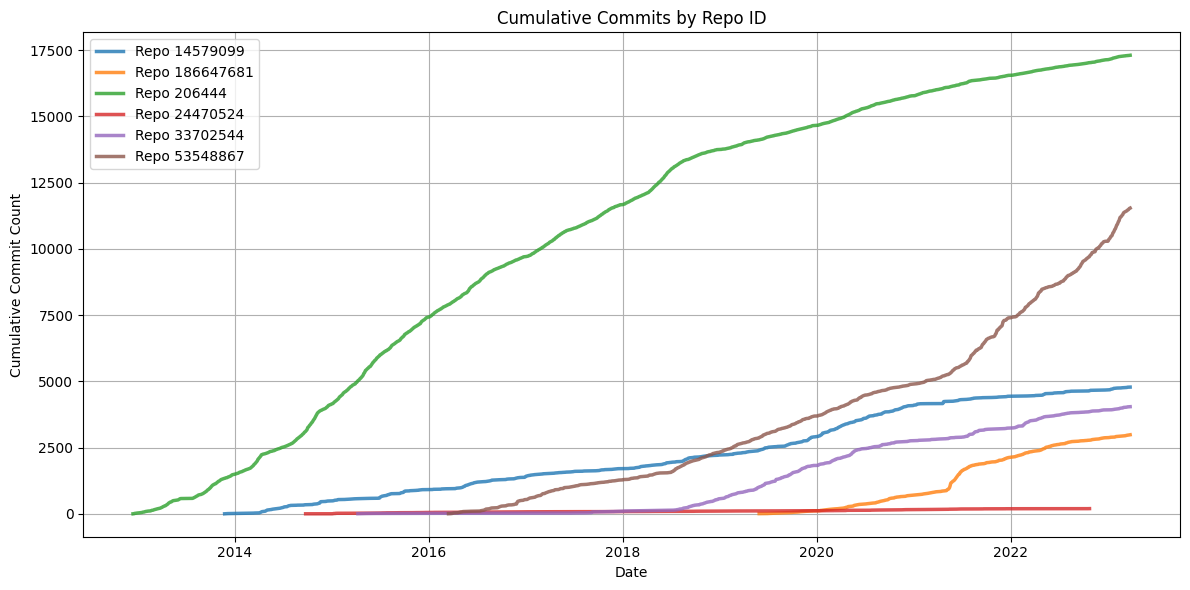

In [127]:
plt.figure(figsize=(12, 6))
for repo_id in cumul_commits_repo1['repo_id'].unique():
    user_daily = cumul_commits_repo1[cumul_commits_repo1['repo_id'] == repo_id]
    plt.plot(user_daily['event_period'], user_daily['smoothed_daily'], 
             label=f'Repo {repo_id}', alpha=0.8, linewidth=2.5)
    
plt.title('Cumulative Commits by Repo ID')
plt.xlabel('Date')
plt.ylabel('Cumulative Commit Count')
plt.xticks()
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
